# Comparison of Higher Order Moments Portfolio with Taiwan 100 Stock
The Taiwan 100 stock data from January 1, 2019, to December 31, 2023.
## Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from scipy.optimize import minimize
import seaborn as sns
np.random.seed(0)


## Data Preparation
Daily returns are calculated from the adjusted closing prices.

In [2]:
Taiwan_stock = pd.read_csv(r'/Users/loyichun/python/Comparison_of_Higher_Order_Moments_Portfolio /taiwan_stock_utf8.csv')
stock_code_column = 'code'
Taiwan_stock[stock_code_column] = Taiwan_stock[stock_code_column].astype(str) + '.TW'
Taiwan_stock.head()


,rank,code,firm,percentage
0,1,2330.TW,台積電,31.79%
1,2,2317.TW,鴻海,3.36%
2,3,2454.TW,聯發科,2.46%
3,4,2382.TW,廣達,1.56%
4,5,2412.TW,中華電,1.49%


In [3]:
Top100 = Taiwan_stock[0:100]
sp100_tickers = Top100['code'].tolist()
sp100_tickers.remove('6526.TW')
daily_prices = pd.DataFrame()
for ticker in sp100_tickers:
    data = yf.download(ticker, start='2019-01-01', end='2023-12-31')
    adj_close = data['Adj Close'].rename(ticker)
    daily_prices = pd.concat([daily_prices, adj_close], axis=1)
daily_prices.index.name = 'Date'
daily_prices.index = pd.to_datetime(daily_prices.index).strftime('%Y-%m-%d')
daily_prices.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,2330.TW,2317.TW,2454.TW,2382.TW,2412.TW,2881.TW,2308.TW,2882.TW,6505.TW,2891.TW,...,2449.TW,2360.TW,8464.TW,4958.TW,9945.TW,2344.TW,9904.TW,8454.TW,1229.TW,3044.TW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,190.780640,55.459576,161.921387,36.765923,88.380898,30.773287,111.323311,36.086143,90.146805,15.695449,...,17.590284,102.422852,201.129410,63.363831,13.649504,11.318761,26.442091,99.055061,16.644949,60.041374
2019-01-03,187.303986,54.510197,164.124405,37.048191,88.380898,30.573027,113.952995,35.496502,91.022003,15.774318,...,17.094248,101.120865,203.670013,58.545296,13.833957,11.019774,27.099039,99.055061,16.532673,60.041374
2019-01-04,180.785278,53.481701,159.351227,36.695354,88.793900,30.239267,114.829559,35.024784,91.459618,15.616574,...,16.292957,98.950890,211.715179,59.107456,13.956924,11.019774,27.427513,100.639931,16.223911,59.817337
2019-01-07,185.131058,54.826664,160.819885,37.048191,89.206902,30.673161,120.965492,35.535809,95.398071,15.853192,...,16.483740,106.328812,219.336945,60.312088,14.202862,11.233336,27.838104,102.224808,16.560741,60.190739
2019-01-08,183.392792,54.272850,163.022903,37.259895,88.380898,30.506277,123.156883,35.496502,94.085258,15.734883,...,16.636368,102.856842,232.463272,59.669621,13.987666,11.147912,28.084459,103.017250,16.448465,60.713486


In [4]:
daily_returns = (daily_prices.pct_change().dropna(axis=0, how='any', inplace=False))
daily_returns.head()


,2330.TW,2317.TW,2454.TW,2382.TW,2412.TW,2881.TW,2308.TW,2882.TW,6505.TW,2891.TW,...,2449.TW,2360.TW,8464.TW,4958.TW,9945.TW,2344.TW,9904.TW,8454.TW,1229.TW,3044.TW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.018223,-0.017118,0.013605,0.007677,0.000000,-0.006508,0.023622,-0.016340,0.009709,0.005025,...,-0.028199,-0.012712,0.012632,-0.076046,0.013514,-0.026415,0.024845,0.000000,-0.006745,0.000000
2019-01-04,-0.034803,-0.018868,-0.029083,-0.009524,0.004673,-0.010917,0.007692,-0.013289,0.004808,-0.010000,...,-0.046875,-0.021459,0.039501,0.009602,0.008889,0.000000,0.012121,0.016000,-0.018676,-0.003731
2019-01-07,0.024038,0.025148,0.009216,0.009615,0.004651,0.014349,0.053435,0.014590,0.043062,0.015152,...,0.011710,0.074561,0.036000,0.020380,0.017621,0.019380,0.014970,0.015748,0.020761,0.006242
2019-01-08,-0.009389,-0.010101,0.013699,0.005714,-0.009259,-0.005441,0.018116,-0.001106,-0.013761,-0.007463,...,0.009259,-0.032653,0.059845,-0.010652,-0.015152,-0.007605,0.008850,0.007752,-0.006780,0.008685
2019-01-09,0.021327,0.018950,0.018018,0.005682,0.004673,0.029541,0.028470,0.017719,0.060465,0.015038,...,0.000000,-0.012658,0.051002,-0.006729,0.031868,0.026820,0.014620,0.015385,0.017065,0.015990


## Descriptive Statistics
The overall descriptive statistics for the daily returns of the S&P 100.

In [5]:
overall_mean = daily_returns.mean().mean()
overall_std = daily_returns.std().mean()
overall_skewness = daily_returns.skew().mean()
overall_kurtosis = daily_returns.kurtosis().mean()

print("Overall Descriptive Statistics:")
print(f"Mean: {overall_mean:.4f}")
print(f"Standard Deviation: {overall_std:.4f}")
print(f"Skewness: {overall_skewness:.4f}")
print(f"Kurtosis: {overall_kurtosis:.4f}")


Overall Descriptive Statistics:
Mean: 0.0011
Standard Deviation: 0.0199
Skewness: 0.2128
Kurtosis: 4.5544


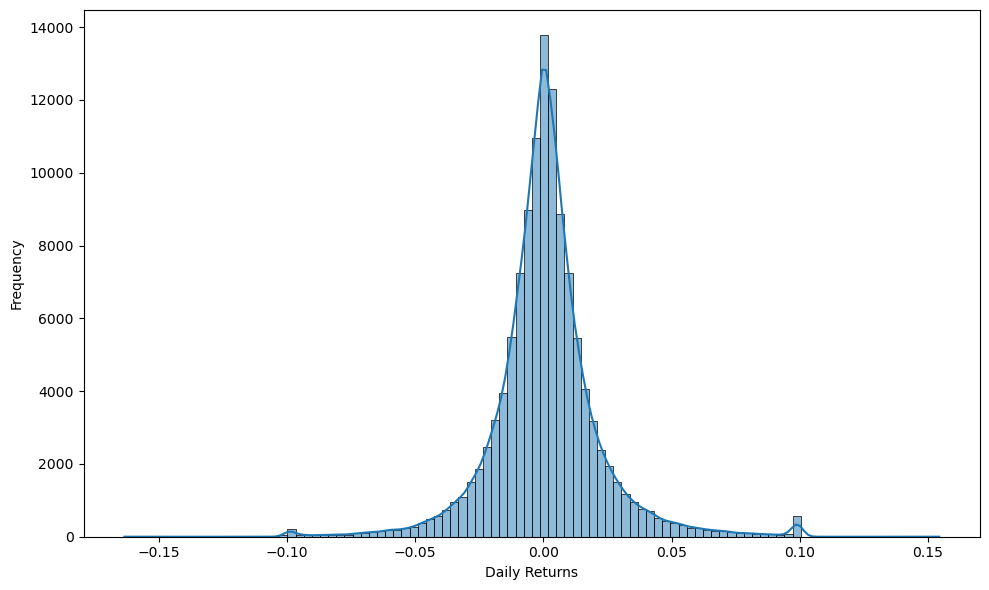

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns.values.flatten(), bins=100, kde=True)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Optimization

In [7]:
def portfolio_returns(weights, mean):
    return (np.sum(mean * weights)) * 252

def portfolio_sd(weights, cov):
    return (np.sqrt(np.dot(np.asarray(weights).T, np.dot(cov * 252, weights))))

def portfolio_variance(weights, cov):
    return (np.dot(np.asarray(weights).T, np.dot(cov * 252, weights)))

def minimum_variance(ret, cov):
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for w in range(ret.shape[1]))
    init = np.random.random(ret.shape[1])
    init /= init.sum()
    optimal = minimize(portfolio_variance, init, args=(cov,), method='SLSQP', bounds=bounds, constraints=constraints)
    return optimal.x

def portfolio_skewness(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    skewness = np.mean(((portfolio_return - mean_return) / std_return) ** 3)
    return skewness

def portfolio_kurtosis(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    kurtosis = np.mean(((portfolio_return - mean_return) / std_return) ** 4)
    return kurtosis

def portfolio_fifth(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    fifth_order = np.mean(((portfolio_return - mean_return) / std_return) ** 5)
    return fifth_order

def portfolio_sixth(weights, returns):
    portfolio_return = np.dot(returns, weights)
    mean_return = np.mean(portfolio_return)
    std_return = np.std(portfolio_return)
    sixth_order = np.mean(((portfolio_return - mean_return) / std_return) ** 6)
    return sixth_order

def minimum_higher_order(returns, order):
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    bounds = tuple((0, 1) for _ in range(returns.shape[1]))
    init = np.random.random(returns.shape[1])
    init /= init.sum()
    optimal = minimize(order, init, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
    return optimal.x

def value_at_risk(returns, confidence_level=0.05):
    var = np.percentile(returns, 100 * confidence_level)
    return var

def evaluate_portfolio(weights, mean_returns, cov_matrix, returns):
    eval_return = portfolio_returns(weights, mean_returns)
    eval_volatility = portfolio_sd(weights, cov_matrix)
    eval_sharpe = eval_return / eval_volatility
    portfolio_returns_series = np.dot(returns, weights)
    eval_var = value_at_risk(portfolio_returns_series)
    return {
        'Return': eval_return,
        'Volatility': eval_volatility,
        'Sharpe Ratio': eval_sharpe,
        'Value at Risk (5%)': eval_var,
    }

def backtest_portfolio(weights, returns):
    portfolio_returns_series = np.dot(returns, weights)
    cumulative_returns = (1 + portfolio_returns_series).cumprod()
    cumulative_returns_series = pd.Series(cumulative_returns, index=returns.index)  
    return cumulative_returns_series


In [8]:
daily_prices_4_yrs = daily_prices.loc['2019-01-01':'2022-12-31']
daily_returns_4_yrs = (daily_prices_4_yrs.pct_change().dropna(axis=0, how='any', inplace=False))
daily_mean_4_yrs = daily_returns_4_yrs.mean()
daily_cov_4_yrs = daily_returns_4_yrs.cov()
daily_prices_1_yr = daily_prices.loc['2023-01-01':'2024-01-01']
daily_returns_1_yr = daily_prices_1_yr.pct_change().dropna(axis=0, how='any')
daily_mean_1_yr = daily_returns_1_yr.mean()
daily_cov_1_yr = daily_returns_1_yr.cov()
daily_returns_1_yr.index = pd.to_datetime(daily_returns_1_yr.index)


### Minimum Variance Portfolio

In [9]:
optimal_weights = minimum_variance(daily_returns_4_yrs, daily_cov_4_yrs)
weights_percent = [round(weight * 100, 4) for weight in optimal_weights]
print('---------- Minimum Variance Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent[i]}%')


---------- Minimum Variance Portfolio ----------
Weights:
2330.TW: 0.0%
2317.TW: 0.0%
2454.TW: 0.0%
2382.TW: 0.0%
2412.TW: 42.556%
2881.TW: 0.0%
2308.TW: 0.0%
2882.TW: 0.0%
6505.TW: 0.0%
2891.TW: 0.0%
3711.TW: 0.0%
2303.TW: 0.0%
2886.TW: 0.2195%
1303.TW: 0.0%
1301.TW: 0.0%
1216.TW: 0.0%
2884.TW: 0.0%
6669.TW: 0.0%
2603.TW: 0.0%
2002.TW: 0.0%
2885.TW: 0.0%
3045.TW: 19.849%
5880.TW: 0.0%
3034.TW: 0.0%
2892.TW: 0.0%
2207.TW: 0.0%
3231.TW: 0.0%
2395.TW: 0.0%
1326.TW: 0.0%
2880.TW: 0.0%
2357.TW: 0.0%
3008.TW: 0.0%
2912.TW: 3.3135%
4904.TW: 3.9394%
5871.TW: 0.0%
3037.TW: 0.0%
2890.TW: 0.0%
2379.TW: 0.0%
2327.TW: 0.0%
4938.TW: 0.0%
2345.TW: 0.0%
3017.TW: 0.0%
1101.TW: 0.0%
3661.TW: 0.0%
2301.TW: 2.5839%
1590.TW: 0.0%
2883.TW: 0.0%
5876.TW: 0.0%
2887.TW: 0.0%
1519.TW: 0.0%
2408.TW: 0.0%
2801.TW: 0.0%
2618.TW: 0.0%
2356.TW: 0.0%
2376.TW: 0.0%
3443.TW: 0.0%
2609.TW: 0.0%
1402.TW: 0.0%
6415.TW: 0.0%
3036.TW: 0.7825%
3533.TW: 0.0%
9910.TW: 0.0%
2324.TW: 5.1555%
1102.TW: 3.0197%
2385.TW: 3.4251%
23

### Minimum Skewness Portfolio

In [10]:
optimal_weights_skewness = minimum_higher_order(daily_returns_4_yrs, portfolio_skewness)
weights_percent_skewness = [round(weight * 100, 4) for weight in optimal_weights_skewness]
print('---------- Minimum Skewness Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_skewness[i]}%')


---------- Minimum Skewness Portfolio ----------
Weights:
2330.TW: 0.0%
2317.TW: 0.0%
2454.TW: 0.0%
2382.TW: 0.0%
2412.TW: 0.0%
2881.TW: 0.0%
2308.TW: 0.0%
2882.TW: 0.0%
6505.TW: 0.0%
2891.TW: 0.2429%
3711.TW: 0.0%
2303.TW: 0.0%
2886.TW: 0.0%
1303.TW: 0.0%
1301.TW: 0.0%
1216.TW: 0.0%
2884.TW: 0.0%
6669.TW: 0.0%
2603.TW: 0.0%
2002.TW: 0.0%
2885.TW: 0.0%
3045.TW: 0.0%
5880.TW: 0.0%
3034.TW: 0.0%
2892.TW: 27.7305%
2207.TW: 0.0%
3231.TW: 0.0%
2395.TW: 0.0%
1326.TW: 0.0%
2880.TW: 0.0%
2357.TW: 2.1106%
3008.TW: 0.0%
2912.TW: 0.0%
4904.TW: 0.0%
5871.TW: 0.0%
3037.TW: 0.0%
2890.TW: 0.0%
2379.TW: 0.0%
2327.TW: 0.0%
4938.TW: 0.0%
2345.TW: 0.0%
3017.TW: 1.3982%
1101.TW: 0.0%
3661.TW: 0.0%
2301.TW: 0.0%
1590.TW: 0.0%
2883.TW: 0.0%
5876.TW: 0.0%
2887.TW: 0.0%
1519.TW: 3.0195%
2408.TW: 0.0%
2801.TW: 0.0%
2618.TW: 0.6722%
2356.TW: 0.0%
2376.TW: 0.0%
3443.TW: 0.0%
2609.TW: 0.0%
1402.TW: 0.0%
6415.TW: 0.0%
3036.TW: 6.5703%
3533.TW: 0.0%
9910.TW: 0.0%
2324.TW: 0.0%
1102.TW: 0.0%
2385.TW: 0.0%
2371.TW: 0

### Minimum Kurtosis Portfolio

In [11]:
optimal_weights_kurtosis = minimum_higher_order(daily_returns_4_yrs, portfolio_kurtosis)
weights_percent_kurtosis = [round(weight * 100, 4) for weight in optimal_weights_kurtosis]
print('---------- Minimum Kurtosis Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_kurtosis[i]}%')


---------- Minimum Kurtosis Portfolio ----------
Weights:
2330.TW: 0.0%
2317.TW: 0.0%
2454.TW: 0.0%
2382.TW: 0.0%
2412.TW: 0.0%
2881.TW: 0.0%
2308.TW: 0.0%
2882.TW: 0.0%
6505.TW: 0.0%
2891.TW: 0.0%
3711.TW: 0.0%
2303.TW: 0.0%
2886.TW: 0.0%
1303.TW: 0.0%
1301.TW: 0.0%
1216.TW: 0.0%
2884.TW: 0.0%
6669.TW: 2.676%
2603.TW: 28.0724%
2002.TW: 0.0%
2885.TW: 0.0%
3045.TW: 0.0%
5880.TW: 0.0%
3034.TW: 0.0%
2892.TW: 0.0%
2207.TW: 0.0%
3231.TW: 0.0%
2395.TW: 0.0%
1326.TW: 0.0%
2880.TW: 0.0%
2357.TW: 0.0%
3008.TW: 0.0%
2912.TW: 10.9829%
4904.TW: 0.0%
5871.TW: 0.0%
3037.TW: 0.0%
2890.TW: 0.0%
2379.TW: 0.0%
2327.TW: 0.0%
4938.TW: 0.0%
2345.TW: 0.9116%
3017.TW: 0.0%
1101.TW: 0.0%
3661.TW: 0.0%
2301.TW: 0.0%
1590.TW: 0.0%
2883.TW: 0.0%
5876.TW: 0.0%
2887.TW: 0.0%
1519.TW: 0.0%
2408.TW: 0.0%
2801.TW: 0.0%
2618.TW: 0.0%
2356.TW: 0.0%
2376.TW: 0.0%
3443.TW: 0.0%
2609.TW: 0.0%
1402.TW: 0.0%
6415.TW: 46.1661%
3036.TW: 0.0%
3533.TW: 0.0%
9910.TW: 0.0%
2324.TW: 0.0%
1102.TW: 0.0%
2385.TW: 11.191%
2371.TW: 0.0

### Minimum Fifth Portfolio

In [12]:
optimal_weights_fifth = minimum_higher_order(daily_returns_4_yrs, portfolio_fifth)
weights_percent_fifth  = [round(weight * 100, 4) for weight in optimal_weights_fifth]
print('---------- Minimum Fifth Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_fifth [i]}%')


---------- Minimum Fifth Portfolio ----------
Weights:
2330.TW: 0.0%
2317.TW: 0.0%
2454.TW: 0.0%
2382.TW: 0.0%
2412.TW: 0.0%
2881.TW: 0.0%
2308.TW: 0.0%
2882.TW: 0.0%
6505.TW: 0.0%
2891.TW: 0.0001%
3711.TW: 0.0%
2303.TW: 0.0%
2886.TW: 0.0%
1303.TW: 0.0%
1301.TW: 0.0%
1216.TW: 0.0%
2884.TW: 0.0001%
6669.TW: 1.7635%
2603.TW: 0.0%
2002.TW: 0.0%
2885.TW: 0.0%
3045.TW: 0.0%
5880.TW: 0.0%
3034.TW: 0.0%
2892.TW: 34.1341%
2207.TW: 0.0%
3231.TW: 0.0%
2395.TW: 0.0%
1326.TW: 0.0%
2880.TW: 0.0%
2357.TW: 2.1985%
3008.TW: 0.0%
2912.TW: 0.0%
4904.TW: 0.0%
5871.TW: 0.0%
3037.TW: 0.0%
2890.TW: 0.0%
2379.TW: 0.0%
2327.TW: 0.0%
4938.TW: 0.0%
2345.TW: 0.0001%
3017.TW: 0.0%
1101.TW: 0.0%
3661.TW: 0.0%
2301.TW: 0.0%
1590.TW: 0.0%
2883.TW: 0.0%
5876.TW: 0.0%
2887.TW: 7.9907%
1519.TW: 0.0%
2408.TW: 0.0%
2801.TW: 0.0%
2618.TW: 0.0%
2356.TW: 0.0%
2376.TW: 0.0%
3443.TW: 0.0%
2609.TW: 0.0%
1402.TW: 0.0%
6415.TW: 0.0%
3036.TW: 6.7973%
3533.TW: 0.5396%
9910.TW: 0.0%
2324.TW: 0.0%
1102.TW: 0.0%
2385.TW: 0.0%
2371.TW

### Minimum Sixth Portfolio

In [13]:
optimal_weights_sixth = minimum_higher_order(daily_returns_4_yrs, portfolio_sixth)
weights_percent_sixth  = [round(weight * 100, 4) for weight in optimal_weights_sixth]
print('---------- Minimum Sixth Portfolio ----------')
print('Weights:')
for i, stock in enumerate(sp100_tickers):
    print(f'{stock}: {weights_percent_sixth [i]}%')


---------- Minimum Sixth Portfolio ----------
Weights:
2330.TW: 0.0%
2317.TW: 0.0%
2454.TW: 0.0%
2382.TW: 0.0%
2412.TW: 0.0%
2881.TW: 0.0%
2308.TW: 0.0%
2882.TW: 0.0%
6505.TW: 0.0%
2891.TW: 0.0%
3711.TW: 0.0%
2303.TW: 0.0%
2886.TW: 0.0%
1303.TW: 0.0%
1301.TW: 0.0%
1216.TW: 0.0%
2884.TW: 0.0%
6669.TW: 1.5823%
2603.TW: 27.4537%
2002.TW: 0.0%
2885.TW: 0.0%
3045.TW: 0.0%
5880.TW: 0.0%
3034.TW: 0.0%
2892.TW: 0.0%
2207.TW: 0.0%
3231.TW: 0.0%
2395.TW: 0.0%
1326.TW: 0.0%
2880.TW: 0.0%
2357.TW: 0.0%
3008.TW: 0.0%
2912.TW: 12.7202%
4904.TW: 0.0%
5871.TW: 0.0%
3037.TW: 0.0%
2890.TW: 0.0%
2379.TW: 0.0%
2327.TW: 0.0%
4938.TW: 0.0%
2345.TW: 1.6199%
3017.TW: 0.0%
1101.TW: 0.0%
3661.TW: 0.0%
2301.TW: 0.0%
1590.TW: 0.0%
2883.TW: 0.0%
5876.TW: 0.0%
2887.TW: 0.0%
1519.TW: 0.0%
2408.TW: 0.0%
2801.TW: 0.0%
2618.TW: 0.0%
2356.TW: 0.0%
2376.TW: 0.0%
3443.TW: 0.0%
2609.TW: 0.0%
1402.TW: 0.0%
6415.TW: 47.0094%
3036.TW: 0.0%
3533.TW: 0.0%
9910.TW: 0.0%
2324.TW: 0.0%
1102.TW: 0.0%
2385.TW: 9.6145%
2371.TW: 0.0%


### Comparison
The performance metrics for the different portfolio optimization models.

In [14]:
portfolios = {
    'Minimum Variance': optimal_weights,
    'Minimum Skewness': optimal_weights_skewness,
    'Minimum Kurtosis': optimal_weights_kurtosis,
    'Minimum Fifth Order': optimal_weights_fifth,
    'Minimum Sixth Order': optimal_weights_sixth
}

portfolio_evaluations = {}
for name, weights in portfolios.items():
    portfolio_evaluations[name] = evaluate_portfolio(weights, daily_mean_1_yr, daily_cov_1_yr, daily_returns_1_yr)

for name, metrics in portfolio_evaluations.items():
    print(f'---------- {name} Portfolio Metrics ----------')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    print()


---------- Minimum Variance Portfolio Metrics ----------
Return: 0.2796
Volatility: 0.0830
Sharpe Ratio: 3.3691
Value at Risk (5%): -0.0074

---------- Minimum Skewness Portfolio Metrics ----------
Return: 0.4351
Volatility: 0.0998
Sharpe Ratio: 4.3579
Value at Risk (5%): -0.0091

---------- Minimum Kurtosis Portfolio Metrics ----------
Return: 0.4176
Volatility: 0.2731
Sharpe Ratio: 1.5291
Value at Risk (5%): -0.0243

---------- Minimum Fifth Order Portfolio Metrics ----------
Return: 0.4099
Volatility: 0.0978
Sharpe Ratio: 4.1921
Value at Risk (5%): -0.0091

---------- Minimum Sixth Order Portfolio Metrics ----------
Return: 0.3981
Volatility: 0.2756
Sharpe Ratio: 1.4448
Value at Risk (5%): -0.0245



## Performance Evaluation and Analysis
The performance of the constructed portfolios was evaluated through various analyses, including cumulative return, rolling Sharpe ratio, and correlation matrix for portfolio returns.

### Cumulative Returns
The cumulative returns for each portfolio over the out-of-sample period.

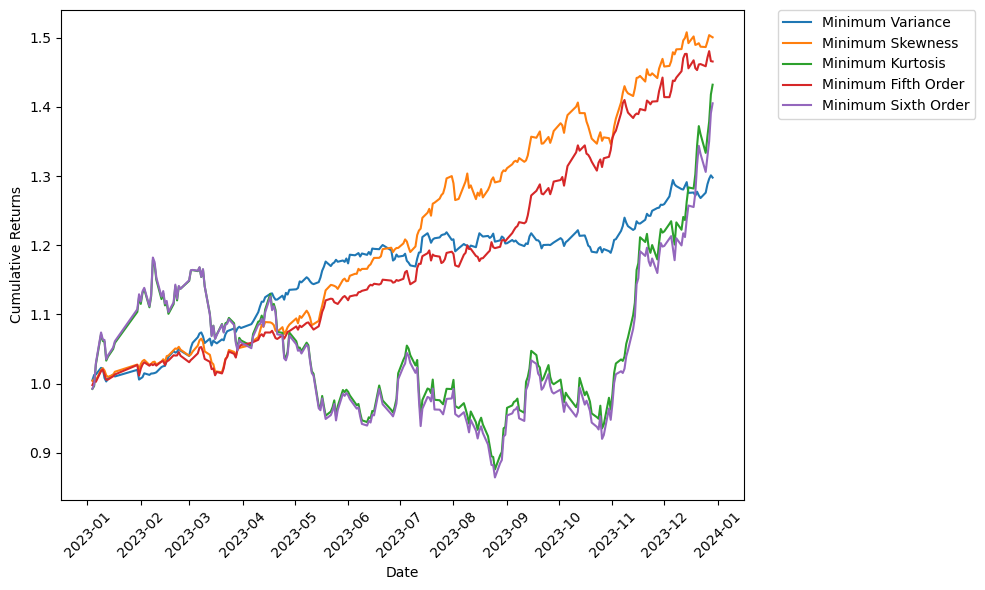

In [15]:
plt.figure(figsize=(10, 6))
for name, weights in portfolios.items():
    cumulative_returns = backtest_portfolio(weights, daily_returns_1_yr)
    plt.plot(cumulative_returns.index, cumulative_returns, label=name)  

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


### Rolling Sharpe Ratio
The rolling Sharpe ratios calculated over a 60-day window.

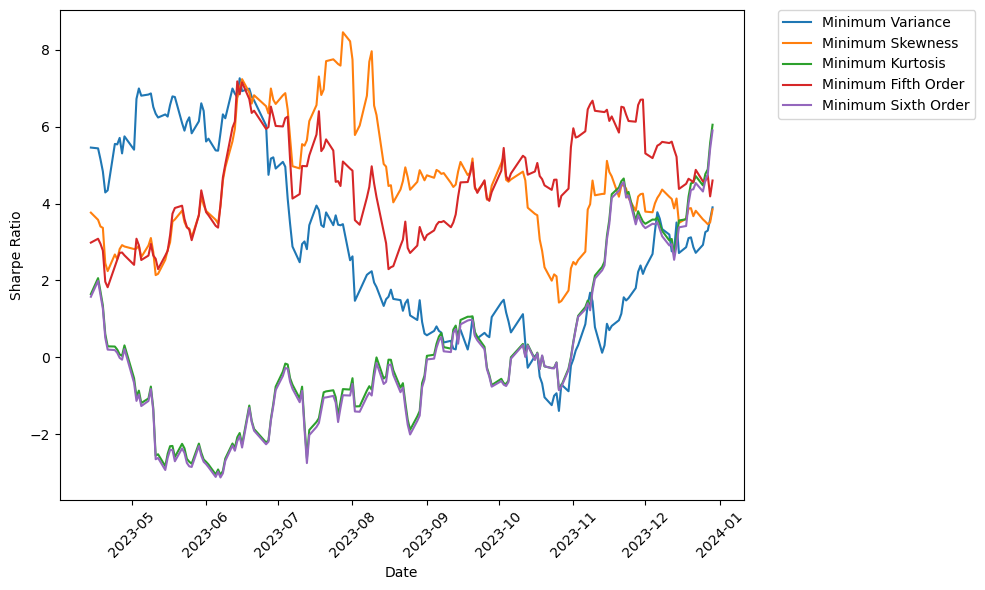

In [16]:
risk_free_rate = 0.01 
window = 60  
plt.figure(figsize=(10, 6)) 
for name, weights in portfolios.items():
    portfolio_returns_series = np.dot(daily_returns_1_yr, weights)
    portfolio_returns_series = pd.Series(portfolio_returns_series, index=daily_returns_1_yr.index)
    rolling_mean = portfolio_returns_series.rolling(window).mean() * 252
    rolling_volatility = portfolio_returns_series.rolling(window).std() * np.sqrt(252)
    rolling_sharpe = (rolling_mean - risk_free_rate) / rolling_volatility
    plt.plot(rolling_sharpe, label=name)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


### Correlation Matrix
The correlation matrix of portfolio returns.

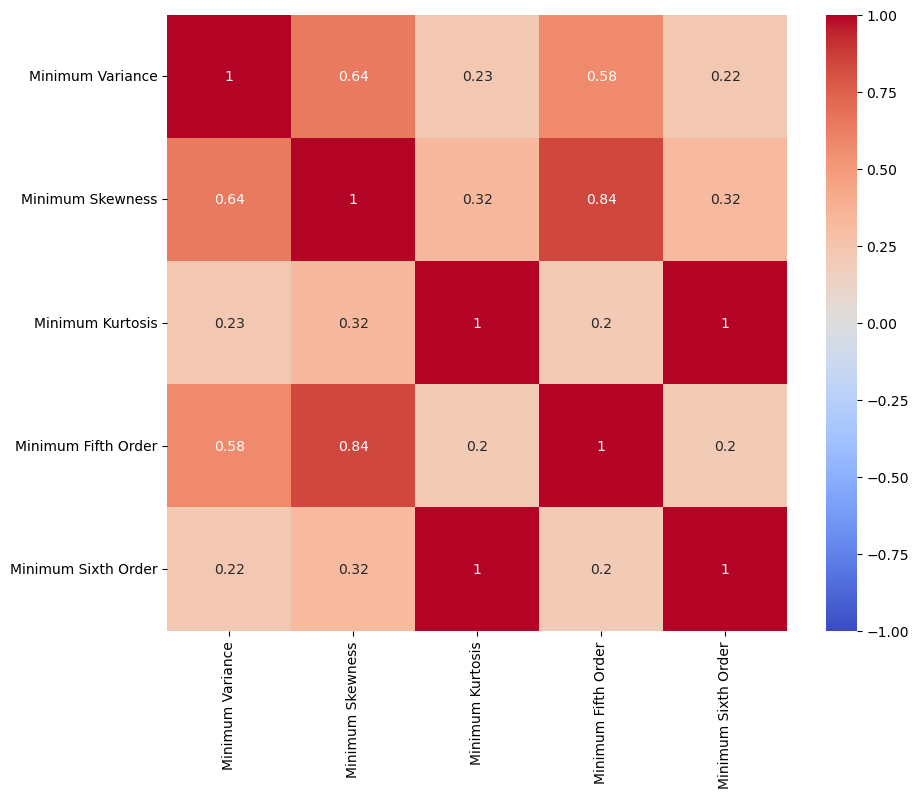

In [17]:
portfolio_returns_df = pd.DataFrame()
for name, weights in portfolios.items():
    portfolio_returns_series = np.dot(daily_returns_1_yr, weights)
    portfolio_returns_df[name] = portfolio_returns_series

correlation_matrix = portfolio_returns_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
